# Introducción a Pandas 🐼

<img src="https://github.com/ProgramandoSinBarreras/MachineLearningCourse/blob/main/Imagenes/02_introduccion_pandas/Pandas.png?raw=true" alt="Drawing" style="width:1000px;">

Pandas es una libreria de código abierto para el lenguaje de programación Python, diseñada específicamente para el **análisis y manipulación de datos**. Su nombre proviene de "Panel Data", haciendo referencia a su capacidad para manejar datos multidimensionales, aunque en la práctica, es ampliamente utilizada para trabajar con datos estructurados en forma de tablas (similar a las hojas de cálculo).

Las dos estructuras de datos principales que ofrece pandas son:

- **Series**: Una estructura unidimensional que puede almacenar datos de diferentes tipos (enteros, cadenas, números de punto flotante, etc.) y tiene etiquetas de índice.
- **DataFrame**: Una estructura bidimensional que funciona como una tabla con filas y columnas, donde cada columna puede ser de un tipo diferente.

![series](https://camo.qiitausercontent.com/5a1924b47a5200f0618fddda44db1f357201d5ef/68747470733a2f2f71696974612d696d6167652d73746f72652e73332e61702d6e6f727468656173742d312e616d617a6f6e6177732e636f6d2f302f3131373437392f32623061326364342d636131392d633665342d313364342d3664323133636432306539642e706e67)

Tomado del siguiente [enlace](https://class.redclara.net/halley/moncora/Jupyter_Notebooks/Pandas.html)

**Características**

Entre las principales características de pandas se encuentran:

- Facilita el acceso y la manipulación de datos dentro de las estructuras `DataFrame` y `Series`.
- Permite importar datos desde archivos CSV directamente a un `DataFrame`, facilitando el trabajo con datos tabulares.
- Permite reindexar un `DataFrame` para reorganizar los datos según se necesite, lo que es útil para ordenar, filtrar o mezclar datos de diferentes maneras.

Para más detalles puedes visitar la [documentación oficial de pandas](https://pandas.pydata.org/pandas-docs/stable/tutorials.html).

In [ ]:
#@title **MONTAR EL DRIVE**  (Colaboratory){ display-mode: "form" }
import os
from google.colab import drive
drive.mount('/content/drive')
os.chdir('/content/drive/My Drive/Machine_Learning_Course')
print(os.getcwd())

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
/content/drive/My Drive/Machine_Learning_Course


In [ ]:
#@title **Cargar librerias**
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_theme()
pd.__version__

'2.2.2'

*Dataset 1*

## 1. Dataframe y series

Los objetos `DataFrame` pueden ser creados pasando un diccionario que mapea nombres de columnas (como cadenas de texto) a objetos `Series`. Por ejemplo:

In [ ]:
city_names = pd.Series(['Bucaramanga', 'Bogotá', 'Málaga'])
population_col = pd.Series([3201, 10157850,000])

data = pd.DataFrame({ 'Ciudades': city_names, 'Population': population_col })
data

,Ciudades,Population
0,Bucaramanga,3201
1,Bogotá,10157850
2,Málaga,0


El **`DataFrame`** se utiliza para la **manipulación de datos**, de manera similar a lo que se hace en [Spark](https://spark.apache.org/) y [R](https://www.r-project.org/about.html). Generalmente, el `DataFrame` carga datos desde archivos externos completos. Estos archivos pueden contener **millones de registros** que pueden ser manipulados con **pandas** utilizando `DataFrame`.

In [ ]:
#@title **code** Carga e inspección
# a =  pd.read_csv("data/california_housing_train.csv")
a =  pd.read_csv("https://storage.googleapis.com/mledu-datasets/california_housing_train.csv", sep=",")
d =  pd.read_csv("https://storage.googleapis.com/mledu-datasets/california_housing_train.csv", sep=",")
type(d), type(a)

(pandas.core.frame.DataFrame, pandas.core.frame.DataFrame)

In [ ]:
#@title **code** Columnas y tamaño
print("columns and shape", d.columns, d.shape)
print("---------------- \n Display data \n---------------")
d.tail(10) #cantidad de resultados que se obtendran

columns and shape Index(['longitude', 'latitude', 'housing_median_age', 'total_rooms',
       'total_bedrooms', 'population', 'households', 'median_income',
       'median_house_value'],
      dtype='object') (17000, 9)
---------------- 
 Display data 
---------------


,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
16990,-124.22,41.73,28.0,3003.0,699.0,1530.0,653.0,1.7038,78300.0
16991,-124.23,41.75,11.0,3159.0,616.0,1343.0,479.0,2.4805,73200.0
16992,-124.23,40.81,52.0,1112.0,209.0,544.0,172.0,3.3462,50800.0
16993,-124.23,40.54,52.0,2694.0,453.0,1152.0,435.0,3.0806,106700.0
16994,-124.25,40.28,32.0,1430.0,419.0,434.0,187.0,1.9417,76100.0
16995,-124.26,40.58,52.0,2217.0,394.0,907.0,369.0,2.3571,111400.0
16996,-124.27,40.69,36.0,2349.0,528.0,1194.0,465.0,2.5179,79000.0
16997,-124.30,41.84,17.0,2677.0,531.0,1244.0,456.0,3.0313,103600.0
16998,-124.30,41.80,19.0,2672.0,552.0,1298.0,478.0,1.9797,85800.0
16999,-124.35,40.54,52.0,1820.0,300.0,806.0,270.0,3.0147,94600.0


In [ ]:
d.describe() #Da un resumen estadistico de las varibles que contienen los datos

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,17000.000000,17000.000000,17000.000000,17000.000000,17000.000000,17000.000000,17000.000000,17000.000000,17000.000000
mean,-119.562108,35.625225,28.589353,2643.664412,539.410824,1429.573941,501.221941,3.883578,207300.912353
std,2.005166,2.137340,12.586937,2179.947071,421.499452,1147.852959,384.520841,1.908157,115983.764387
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.790000,33.930000,18.000000,1462.000000,297.000000,790.000000,282.000000,2.566375,119400.000000
50%,-118.490000,34.250000,29.000000,2127.000000,434.000000,1167.000000,409.000000,3.544600,180400.000000
75%,-118.000000,37.720000,37.000000,3151.250000,648.250000,1721.000000,605.250000,4.767000,265000.000000
max,-114.310000,41.950000,52.000000,37937.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


In [ ]:
d.info() #Da informacion sobre la estructura del archivo que acaba de cargar

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17000 entries, 0 to 16999
Data columns (total 9 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           17000 non-null  float64
 1   latitude            17000 non-null  float64
 2   housing_median_age  17000 non-null  float64
 3   total_rooms         17000 non-null  float64
 4   total_bedrooms      17000 non-null  float64
 5   population          17000 non-null  float64
 6   households          17000 non-null  float64
 7   median_income       17000 non-null  float64
 8   median_house_value  17000 non-null  float64
dtypes: float64(9)
memory usage: 1.2 MB


**Pandas** simplifica la creación de histogramas a través del método `hist()` disponible para objetos `Series` y `DataFrame`. Este método utiliza **Matplotlib** internamente para la generación de gráficos, pero permite una integración fluida dentro del flujo de trabajo de pandas.

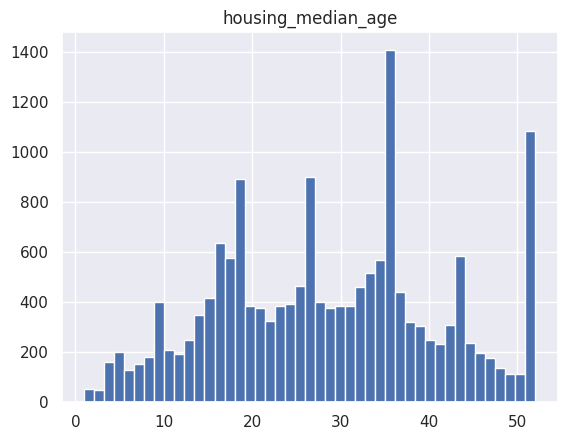

In [ ]:
d.hist('housing_median_age',bins=45);

In [ ]:
d[1000:1015] #acceso a una serie de datos específicos

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
1000,-117.1,33.36,19.0,3518.0,658.0,2091.0,610.0,3.2614,168800.0
1001,-117.1,33.17,12.0,2465.0,412.0,1226.0,428.0,5.4819,183800.0
1002,-117.1,33.15,5.0,3159.0,685.0,1398.0,581.0,3.1467,161100.0
1003,-117.1,33.14,7.0,10665.0,2576.0,4917.0,2424.0,2.3171,159500.0
1004,-117.1,33.12,12.0,961.0,342.0,315.0,201.0,0.8130,275000.0
1005,-117.1,33.00,5.0,15502.0,2613.0,7417.0,2358.0,5.9094,261100.0
1006,-117.1,32.97,17.0,3167.0,861.0,2098.0,828.0,2.4459,85800.0
1007,-117.1,32.96,7.0,3619.0,770.0,1134.0,482.0,4.1279,167600.0
1008,-117.1,32.90,16.0,2994.0,445.0,1047.0,437.0,5.1490,184300.0
1009,-117.1,32.83,16.0,4214.0,744.0,1820.0,699.0,4.3783,179500.0


In [ ]:
d["median_house_value"][500] #acceso a un dato en particular

154600.0

In [ ]:
type(d), type(d["median_house_value"]) #Estamos trabajando con el Dataframe d y la columna median_house_value

(pandas.core.frame.DataFrame, pandas.core.series.Series)

In [ ]:
#.unique devuelve un array de los valores únicos presentes en la Serie seleccionada
print(d["population"].unique()   )
print(d["housing_median_age"].unique()   )

[1015. 1129.  333. ... 1899.  516. 3546.]
[15. 19. 17. 14. 20. 29. 25. 41. 34. 46. 16. 21. 48. 31. 28. 24. 18. 30.
 32. 23. 38. 35. 33. 13. 11. 10.  6. 12. 27. 22.  5.  8. 37.  3. 44.  2.
 26.  9.  7. 36.  4. 52. 40. 43. 42. 39. 49. 47. 50. 45. 51.  1.]


#### Fijar y segmentar los datos

In [ ]:
#Añadir nuevas columnas al dataset
d["new"] = population_col
d.head(10)

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,new
0,-114.31,34.19,15.0,5612.0,1283.0,1015.0,472.0,1.4936,66900.0,3201.0
1,-114.47,34.40,19.0,7650.0,1901.0,1129.0,463.0,1.8200,80100.0,10157850.0
2,-114.56,33.69,17.0,720.0,174.0,333.0,117.0,1.6509,85700.0,0.0
3,-114.57,33.64,14.0,1501.0,337.0,515.0,226.0,3.1917,73400.0,NaN
4,-114.57,33.57,20.0,1454.0,326.0,624.0,262.0,1.9250,65500.0,NaN
5,-114.58,33.63,29.0,1387.0,236.0,671.0,239.0,3.3438,74000.0,NaN
6,-114.58,33.61,25.0,2907.0,680.0,1841.0,633.0,2.6768,82400.0,NaN
7,-114.59,34.83,41.0,812.0,168.0,375.0,158.0,1.7083,48500.0,NaN
8,-114.59,33.61,34.0,4789.0,1175.0,3134.0,1056.0,2.1782,58400.0,NaN
9,-114.60,34.83,46.0,1497.0,309.0,787.0,271.0,2.1908,48100.0,NaN


In [ ]:
#Identificar y contar los valores nulos (faltantes) en cada columna de un DataFrame
for col in d.columns:
    print (col, np.sum(pd.isnull(d[col])))

longitude 0
latitude 0
housing_median_age 0
total_rooms 0
total_bedrooms 0
population 0
households 0
median_income 0
median_house_value 0
new 16997


In [ ]:
#Rellenar Valores Nulos en una Columna con la Media de Otra Columna
d.new.fillna(population_col.mean(), inplace=True)
d.head(10)

<ipython-input-14-8b3a300ec2d1>:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  d.new.fillna(population_col.mean(), inplace=True)


,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,new
0,-114.31,34.19,15.0,5612.0,1283.0,1015.0,472.0,1.4936,66900.0,3201.0
1,-114.47,34.40,19.0,7650.0,1901.0,1129.0,463.0,1.8200,80100.0,10157850.0
2,-114.56,33.69,17.0,720.0,174.0,333.0,117.0,1.6509,85700.0,0.0
3,-114.57,33.64,14.0,1501.0,337.0,515.0,226.0,3.1917,73400.0,3387017.0
4,-114.57,33.57,20.0,1454.0,326.0,624.0,262.0,1.9250,65500.0,3387017.0
5,-114.58,33.63,29.0,1387.0,236.0,671.0,239.0,3.3438,74000.0,3387017.0
6,-114.58,33.61,25.0,2907.0,680.0,1841.0,633.0,2.6768,82400.0,3387017.0
7,-114.59,34.83,41.0,812.0,168.0,375.0,158.0,1.7083,48500.0,3387017.0
8,-114.59,33.61,34.0,4789.0,1175.0,3134.0,1056.0,2.1782,58400.0,3387017.0
9,-114.60,34.83,46.0,1497.0,309.0,787.0,271.0,2.1908,48100.0,3387017.0


#### Filtrar data con indices booleanos

In [ ]:
d[d.total_bedrooms>5290.0]

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
2871,-117.74,33.89,4.0,37937.0,5471.0,16122.0,5189.0,7.4947,366300.0
12772,-121.79,36.64,11.0,32627.0,6445.0,28566.0,6082.0,2.3087,118800.0


<img src="https://github.com/ProgramandoSinBarreras/MachineLearningCourse/blob/main/Imagenes/01_introduccion_python/student_challenge.png?raw=true" alt="Drawing" style="width:200px;">

- Ahora, crea un conjunto de datos que solo incluya las filas que tienen `median_house_value` (valor medio de la vivienda) mayor a `30000`, `housing_median_age` (edad mediana de la vivienda) menor a `50`, y `population` (población) mayor a `10000`.
- Devuelve el nuevo DataFrame.

#### Index

En **pandas**, tanto las **`Series`** como los **`DataFrame`** poseen una propiedad llamada **`index`** que actúa como un **identificador único** para cada elemento o fila. Esta propiedad es fundamental para diversas operaciones de manipulación y análisis de datos, ya que permite **referenciar** y **acceder** a los datos de manera eficiente.

In [ ]:
print(d.index)
print(type(d.index))

print(population_col.index)
print(type(population_col))

RangeIndex(start=0, stop=17000, step=1)
<class 'pandas.core.indexes.range.RangeIndex'>
RangeIndex(start=0, stop=3, step=1)
<class 'pandas.core.series.Series'>


In [ ]:
#reordenar las filas manualmente
d.reindex([2, 0, 1])

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,new
2,-114.56,33.69,17.0,720.0,174.0,333.0,117.0,1.6509,85700.0,0.0
0,-114.31,34.19,15.0,5612.0,1283.0,1015.0,472.0,1.4936,66900.0,3201.0
1,-114.47,34.40,19.0,7650.0,1901.0,1129.0,463.0,1.8200,80100.0,10157850.0


In [ ]:
#reindexar es una excelente manera de mezclar (aleatorizar) un DataFrame
d.reindex(np.random.permutation(d.index)).head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,new
5886,-118.20,33.87,42.0,1482.0,310.0,1052.0,317.0,3.9469,158200.0,3387017.0
8843,-118.71,34.27,26.0,990.0,223.0,719.0,232.0,3.1630,179400.0,3387017.0
7923,-118.40,33.88,35.0,1753.0,296.0,615.0,275.0,7.5000,500001.0,3387017.0
12210,-121.46,38.48,8.0,3593.0,659.0,1710.0,530.0,3.5227,93100.0,3387017.0
6408,-118.26,33.94,44.0,795.0,181.0,716.0,167.0,2.0000,90300.0,3387017.0


In [ ]:
#ordenar valores
d.sort_values(by="housing_median_age").head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,new
13708,-122.00,38.23,1.0,2062.0,343.0,872.0,268.0,5.2636,191300.0,3387017.0
10993,-120.93,37.65,1.0,2254.0,328.0,402.0,112.0,4.2500,189200.0,3387017.0
1353,-117.17,34.12,2.0,3867.0,573.0,1275.0,433.0,5.4138,164400.0,3387017.0
8765,-118.61,34.38,2.0,5989.0,883.0,1787.0,613.0,6.6916,329500.0,3387017.0
8672,-118.56,34.42,2.0,966.0,270.0,233.0,169.0,1.9667,450000.0,3387017.0


In [ ]:
#eliminar columnas
del d['new']
d.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
0,-114.31,34.19,15.0,5612.0,1283.0,1015.0,472.0,1.4936,66900.0
1,-114.47,34.40,19.0,7650.0,1901.0,1129.0,463.0,1.8200,80100.0
2,-114.56,33.69,17.0,720.0,174.0,333.0,117.0,1.6509,85700.0
3,-114.57,33.64,14.0,1501.0,337.0,515.0,226.0,3.1917,73400.0
4,-114.57,33.57,20.0,1454.0,326.0,624.0,262.0,1.9250,65500.0


*Dataset 2*

Ahora, utilizaremos un conjunto de datos más específico para explorar las funcionalidades de pandas en el tiempo. Para apreciar mejor este tipo de funcionalidades, emplearemos un nuevo conjunto de datos relacionado con el índice climático AO (Oscilación Ártica).

La Oscilación Ártica (AO) es un indicador climático que describe las variaciones en las diferencias de presión atmosférica entre el Ártico y las latitudes medias. Este índice influye significativamente en los patrones climáticos, especialmente en Europa.

* AO+ (Altas diferencias de presión): Vientos occidentales intensos desde el Atlántico hacia Europa, proporcionando inviernos templados.

* AO- (Bajas diferencias de presión): Vientos más débiles, permitiendo que el aire frío del Ártico descienda, resultando en inviernos muy fríos.

## 2. Gráficas con matplotlib y pandas

In [ ]:
ao = np.loadtxt('/content/monthly_ao.txt')
print(ao.shape)
dates = pd.date_range('1950-01', periods=ao.shape[0], freq='M')
dates

(823, 3)


<ipython-input-17-124dc4dea572>:3: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  dates = pd.date_range('1950-01', periods=ao.shape[0], freq='M')


DatetimeIndex(['1950-01-31', '1950-02-28', '1950-03-31', '1950-04-30',
               '1950-05-31', '1950-06-30', '1950-07-31', '1950-08-31',
               '1950-09-30', '1950-10-31',
               ...
               '2017-10-31', '2017-11-30', '2017-12-31', '2018-01-31',
               '2018-02-28', '2018-03-31', '2018-04-30', '2018-05-31',
               '2018-06-30', '2018-07-31'],
              dtype='datetime64[ns]', length=823, freq='ME')

In [ ]:
ao

array([[ 1.9500e+03,  1.0000e+00, -6.0310e-02],
       [ 1.9500e+03,  2.0000e+00,  6.2681e-01],
       [ 1.9500e+03,  3.0000e+00, -8.1275e-03],
       ...,
       [ 2.0180e+03,  5.0000e+00,  1.1796e+00],
       [ 2.0180e+03,  6.0000e+00,  3.7988e-01],
       [ 2.0180e+03,  7.0000e+00,  6.1175e-01]])

💡 La integración de Matplotlib con pandas proporciona una poderosa combinación para la manipulación y visualización de datos en Python. Al utilizar los métodos de visualización de pandas, puedes generar gráficos de manera rápida y eficiente, aprovechando al mismo tiempo las capacidades de personalización de Matplotlib.

1950-01-31   -0.060310
1950-02-28    0.626810
1950-03-31   -0.008127
1950-04-30    0.555100
1950-05-31    0.071577
Freq: ME, dtype: float64


<Axes: >

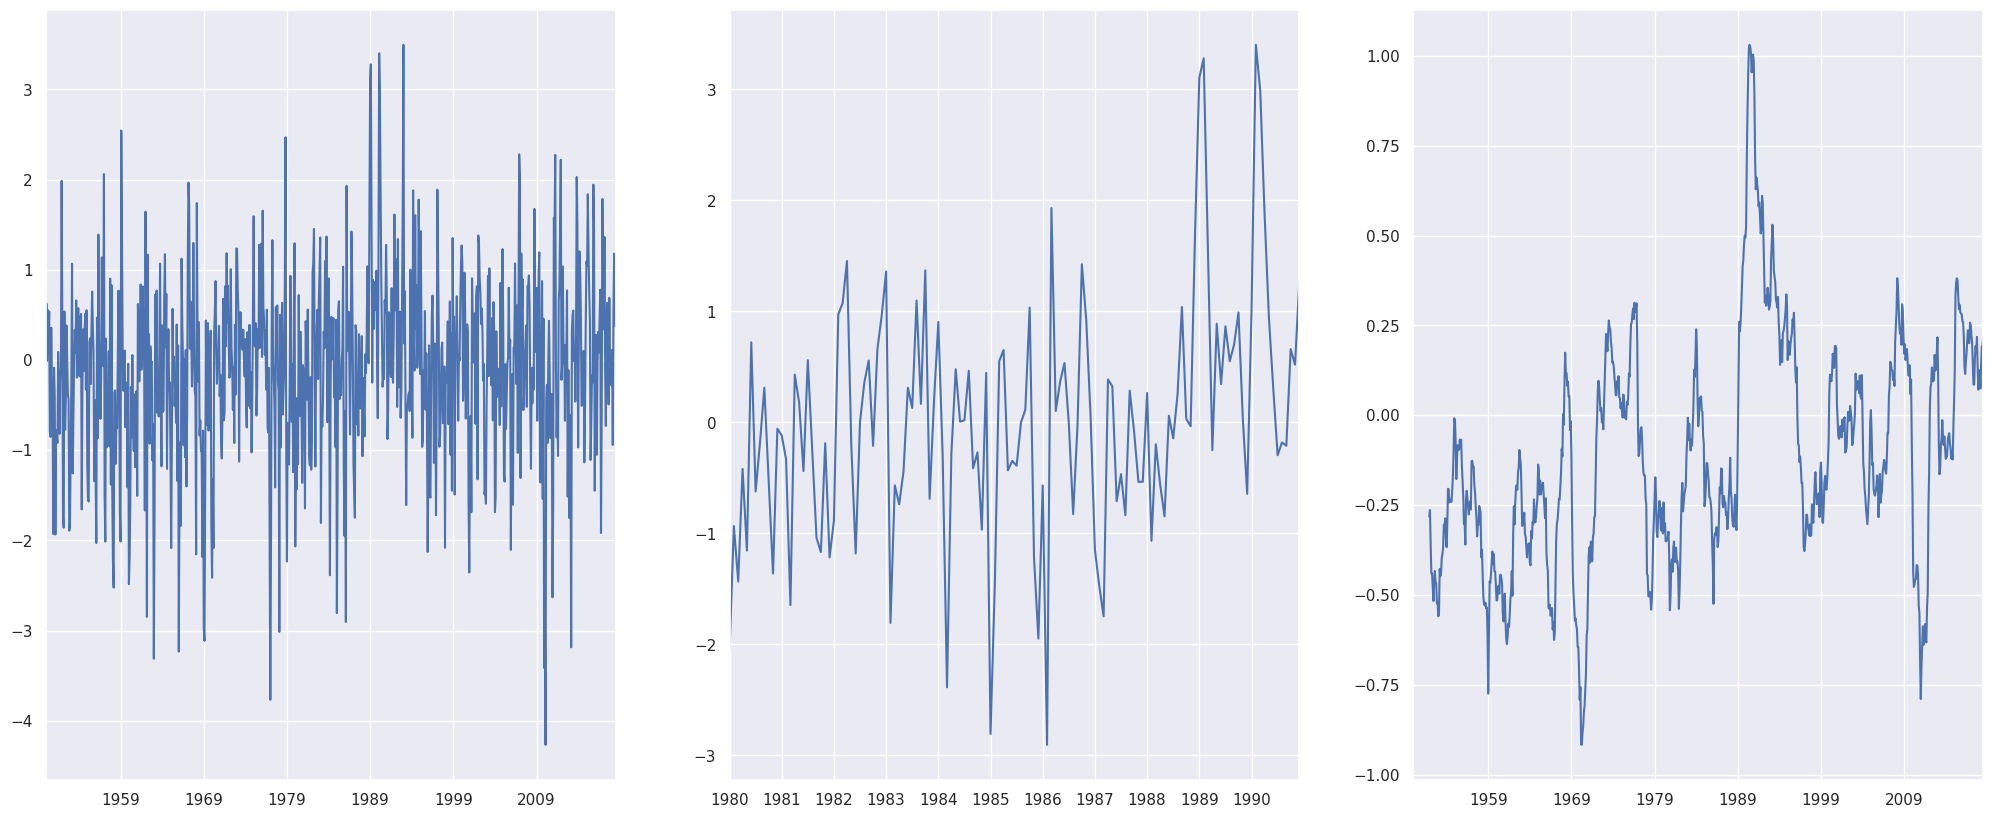

In [ ]:
#@title **code** Visualización de series
#serie completa AO
AO = pd.Series(ao[:,2], index=dates)
print(AO.head())
plt.figure(figsize = (25, 10))
ax= plt.subplot(1,3,1)
AO.plot();
#Filtración de datos entre 1980 y 1990
ax= plt.subplot(1,3,2)
AO['1980':'1990'].plot()
#Media móvil de 24 meses
ax= plt.subplot(1,3,3)
AO.rolling(24).mean().plot()

In [ ]:
# Selección por año
AO['1960'] #saca los datos relacionados a un solo año

,0
1960-01-31,-2.484200
1960-02-29,-2.212400
1960-03-31,-1.624600
1960-04-30,-0.297310
1960-05-31,-0.857430
1960-06-30,0.054978
1960-07-31,-0.619060
1960-08-31,-1.007900
1960-09-30,-0.381640
1960-10-31,-1.187000


Pandas proporciona una forma sencilla de remuestrear datos a diferentes frecuencias temporales.

<ipython-input-21-4b7ebd053d26>:1: FutureWarning: 'A' is deprecated and will be removed in a future version, please use 'YE' instead.
  AO_mm = AO.resample("A").mean()
<ipython-input-21-4b7ebd053d26>:3: FutureWarning: 'A' is deprecated and will be removed in a future version, please use 'YE' instead.
  AO_mm = AO.resample("A").median()


<Axes: >

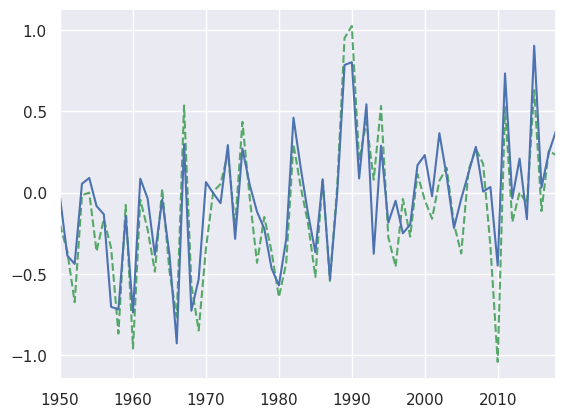

In [ ]:
AO_mm = AO.resample("A").mean()
AO_mm.plot(style='g--')
AO_mm = AO.resample("A").median()
AO_mm.plot()

<ipython-input-22-d99319798d67>:2: FutureWarning: 'A' is deprecated and will be removed in a future version, please use 'YE' instead.
  AO_mm = AO.resample("A").apply(['mean', np.min, np.max])
<ipython-input-22-d99319798d67>:2: FutureWarning: The provided callable <function min at 0x7b47be5839a0> is currently using SeriesGroupBy.min. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "min" instead.
  AO_mm = AO.resample("A").apply(['mean', np.min, np.max])
<ipython-input-22-d99319798d67>:2: FutureWarning: The provided callable <function max at 0x7b47be583880> is currently using SeriesGroupBy.max. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "max" instead.
  AO_mm = AO.resample("A").apply(['mean', np.min, np.max])


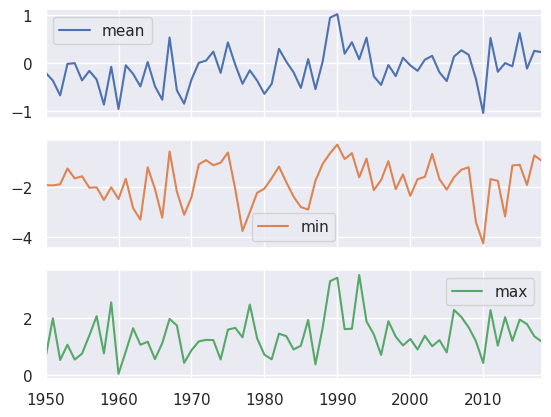

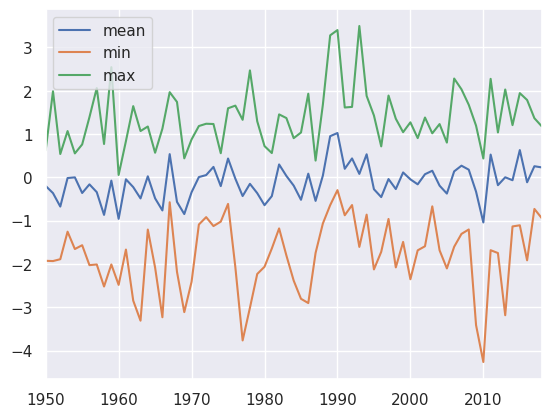

In [ ]:
#Remuestrear con otra operación, por ejemplo min y max.
AO_mm = AO.resample("A").apply(['mean', np.min, np.max])
AO_mm['1900':'2020'].plot(subplots=True);
AO_mm['1900':'2020'].plot();

<ipython-input-24-dfecf66a7381>:2: FutureWarning: DatetimeIndexResampler.fillna is deprecated and will be removed in a future version. Use obj.ffill(), obj.bfill(), or obj.nearest() instead.
  AO_res = AO.resample(pd.Timedelta("12h")).fillna(method="pad").head() #pasamos a una resolución temporal de cada 12 horas


<Axes: >

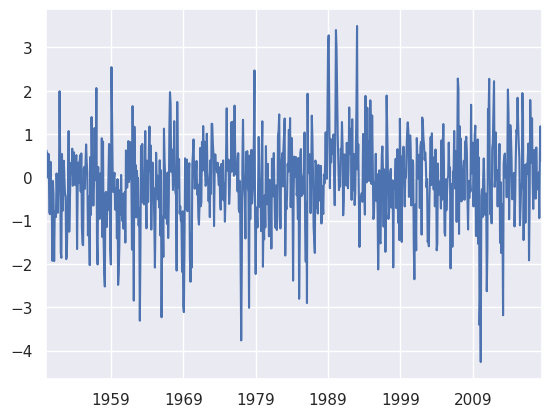

In [ ]:
#Oversampling está relacionado con aumentar la frecuencia temporal de los datos
AO_res = AO.resample(pd.Timedelta("12h")).fillna(method="pad").head() #pasamos a una resolución temporal de cada 12 horas
AO.plot()

In [ ]:
AO.head()

,0
1950-01-31,-0.060310
1950-02-28,0.626810
1950-03-31,-0.008127
1950-04-30,0.555100
1950-05-31,0.071577


### 2.1 Trabajar con datos sincronizados de distintas fuentes

<img src="https://github.com/ProgramandoSinBarreras/MachineLearningCourse/blob/main/Imagenes/02_introduccion_pandas/aonao.png?raw=true" style="width:500px;">

Nota: vamos a utilizar los datos de NAO que representa el índice de oscilación del atlántico norte.

In [ ]:
#@title **code** Usando dos series en un único Dataframe
nao = np.loadtxt('/content/monthly_anao.txt')
dates_nao = pd.date_range('1950-01', periods=nao.shape[0], freq='M')

ao = np.loadtxt('/content/monthly_ao.txt')
dates = pd.date_range('1950-01', periods=ao.shape[0], freq='M')

AO = pd.Series(ao[:,2], index=dates)
NAO = pd.Series(nao[:,2], index=dates_nao)
NAO.index

<ipython-input-27-93c38009a17d>:3: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  dates_nao = pd.date_range('1950-01', periods=nao.shape[0], freq='M')
<ipython-input-27-93c38009a17d>:6: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  dates = pd.date_range('1950-01', periods=ao.shape[0], freq='M')


DatetimeIndex(['1950-01-31', '1950-02-28', '1950-03-31', '1950-04-30',
               '1950-05-31', '1950-06-30', '1950-07-31', '1950-08-31',
               '1950-09-30', '1950-10-31',
               ...
               '2017-10-31', '2017-11-30', '2017-12-31', '2018-01-31',
               '2018-02-28', '2018-03-31', '2018-04-30', '2018-05-31',
               '2018-06-30', '2018-07-31'],
              dtype='datetime64[ns]', length=823, freq='ME')

,AO,NAO
1950-01-31,-0.060310,0.92
1950-02-28,0.626810,0.40
1950-03-31,-0.008127,-0.36
1950-04-30,0.555100,0.73
1950-05-31,0.071577,-0.59


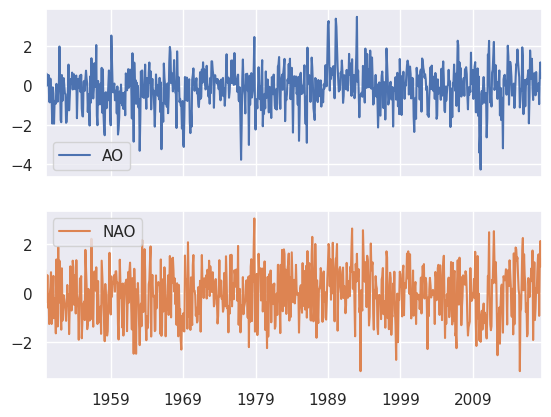

In [ ]:
aonao = pd.DataFrame({'AO' : AO, 'NAO' : NAO})
aonao.plot(subplots=True)

aonao.head()

In [ ]:
#@title **code**Añadir columna al Dataframe
aonao['Diff'] = aonao['AO'] - aonao['NAO']
aonao.head()

,AO,NAO,Diff
1950-01-31,-0.060310,0.92,-0.980310
1950-02-28,0.626810,0.40,0.226810
1950-03-31,-0.008127,-0.36,0.351872
1950-04-30,0.555100,0.73,-0.174900
1950-05-31,0.071577,-0.59,0.661577


**Rolling mean**

Es una técnica estadística utilizada para analizar datos a lo largo del tiempo, se calcula promediando un conjunto de puntos de datos dentro de una ventana móvil que avanza a lo largo de la serie temporal.

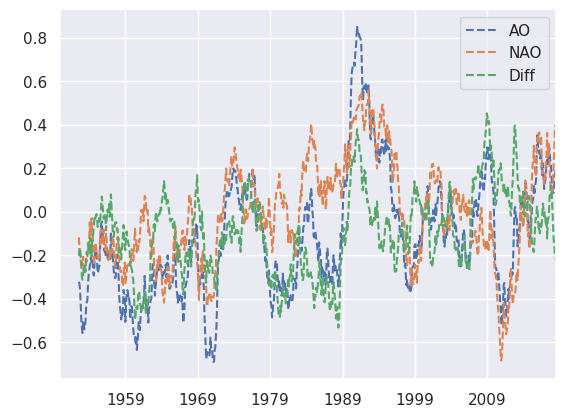

In [ ]:
aonao.rolling(window=32, center=False).mean().plot(style='--')
del aonao['Diff'] #eliminamos la columna creada

,AO,NAO
AO,1.000000,0.604537
NAO,0.604537,1.000000


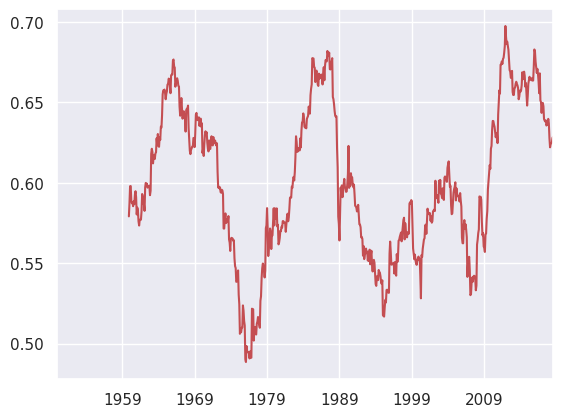

In [ ]:
aonao.AO.rolling(window=120).corr(other=aonao.NAO).plot(style='-r')
aonao.corr()

## Referencias

[1] official panda doc sites:http://pandas.pydata.org/pandas-docs/stable/index.html

[2] Description of a dataset: https://www.kaggle.com/camnugent/california-housing-prices

<img src="https://github.com/ProgramandoSinBarreras/MachineLearningCourse/blob/main/Imagenes/01_introduccion_python/programando_sin_barreras.jpeg?raw=true" alt="Drawing" style="width:1000px;">